In [5]:
import inclconf

inclconf.configure_includepath()

In [6]:
from src.fusion_detector.thirdparty.pytorch_cifar10 import module as M
from src.fusion_detector import datasource

resnet = M.resnet50(pretrained=True)
x, y = datasource.CifarBatchDataSource(8).batch()

In [13]:
import torchattacks

attack = torchattacks.PGD(resnet, eps=8/255)

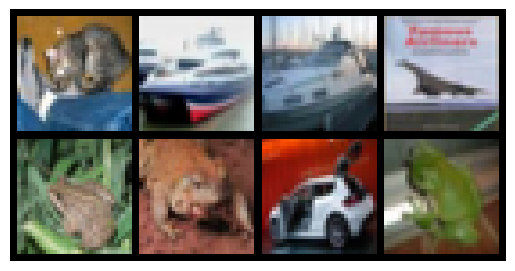

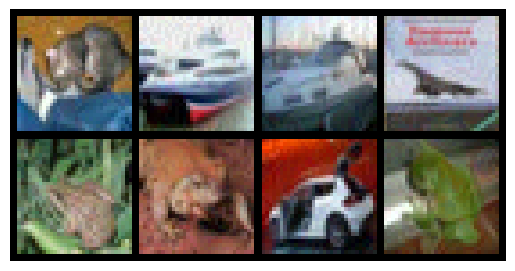

In [14]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as V
from torchvision.utils import make_grid

def imshow(t: torch.Tensor) -> None:
    img = V.to_pil_image(make_grid(t, nrow=4))
    plt.axis("off")
    plt.imshow(img)
    plt.show()

imshow(x)
imshow(attack(x, y))